In [1]:
# Data Analitycs packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
# Read the data
df_train = pd.read_csv('./data/train.csv',
                      low_memory=False,
                      index_col='Id')
df_test = pd.read_csv('./data/test.csv',
                     low_memory=False,
                     index_col='Id')

In [3]:
y = df_train['SalePrice'].copy()

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
missing_val_count_by_column = (df_train.isnull().sum())
missing_cols = missing_val_count_by_column[missing_val_count_by_column > 0].index
print(missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [6]:
for x in missing_cols:
    print(df_train[x].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix        

In [7]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [8]:
df_train[[
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
    'GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish',
    'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'BsmtQual',
    'MasVnrArea', 'MasVnrType', 'Electrical', 'SalePrice'
]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageType    1379 non-null   object 
 7   GarageYrBlt   1379 non-null   float64
 8   GarageQual    1379 non-null   object 
 9   GarageCond    1379 non-null   object 
 10  GarageFinish  1379 non-null   object 
 11  BsmtFinType2  1422 non-null   object 
 12  BsmtExposure  1422 non-null   object 
 13  BsmtCond      1423 non-null   object 
 14  BsmtFinType1  1423 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

<AxesSubplot:>

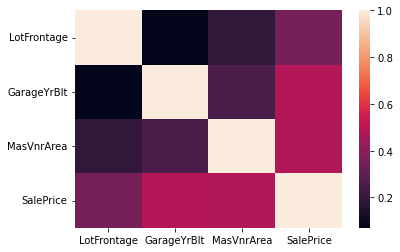

In [9]:
# plt.figure(figsize=(16, 32))
sns.heatmap(df_train[[
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
    'GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish',
    'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'BsmtQual',
    'MasVnrArea', 'MasVnrType', 'Electrical', 'SalePrice'
]].corr())


In [10]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
df_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [12]:
df_train['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [13]:
# to drop variables
df_train = df_train.drop(columns=['SalePrice'])

<AxesSubplot:>

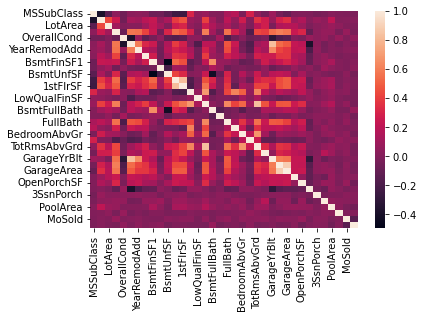

In [14]:
# plt.figure(figsize=(10, 16))
sns.heatmap(df_train.corr())

In [15]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = df_train[features].copy()

In [16]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      train_size=0.8,
                                                      test_size=0.2,
                                                      random_state=0)